# Importing the dataset

the dataset was uploaded in the colab directory and imported through Pandas. The first five rows of the dataset was printed to check the structure and nature of data in the dataset

In [ ]:
import pandas as pd

df = pd.read_csv("/content/movie.csv", engine='python')
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


## Identifying Labels

To see how many unique labels the dataset contains. By theory, there should only be two labels - 0 for negative review and 1 for positive review

In [ ]:
df["label"].unique()

array([0, 1])

## Getting info about columns

text column has object type data and labels are int64. One would expect the text column to contain string type data, hence it was necessary to cross-check

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


<Axes: xlabel='label', ylabel='count'>

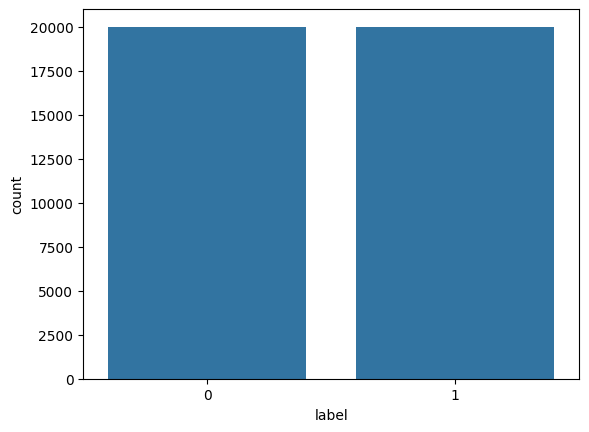

In [ ]:
import seaborn as sns

sns.countplot(x='label', data=df)

# Data Cleaning

## Removing duplicates

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
39995,False
39996,False
39997,False
39998,False


In [ ]:
duplicates = int(df.duplicated().sum())
duplicates

277

In [ ]:
duplicate_specific = df.duplicated(subset=['text'])
print(duplicate_specific)

0        False
1        False
2        False
3        False
4        False
         ...  
39995    False
39996    False
39997    False
39998    False
39999    False
Length: 40000, dtype: bool


In [ ]:
df = df.drop_duplicates()
df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


# Exploratory Data Analysis

After cleaning the data, we check label counts again to see if there has been any imbalance in the number of positive and negative reviews. There appears to be a slight difference in the number of positive and negative reviews.

Next, we check the relationshp between text length and the label. A denisty plot is created that shows that both positive and negative reviews are rather short. There are a few reviews that are lengthy and detailed, but the distribution is rather similar for both types of reviews.

The same information may be conveyed by a histogram that depicts the number of reviews against the number of words in them, both for positive (in red) and negative (in green). Again, we see that majority reviews are short in length. The distribution - as mentioned above - is similar for both positive and negative reviews.

In [ ]:
counts = df['label'].value_counts()
print(counts)

label
1    19908
0    19815
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

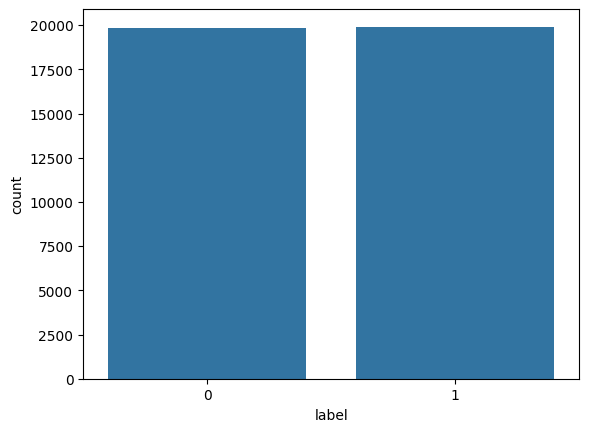

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x='label', data=df)

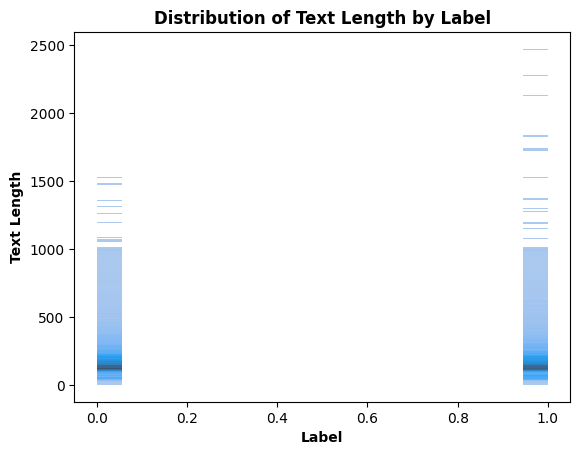

In [ ]:
df["text_length"] = df["text"].apply(lambda x: len(x.split()))

sns.histplot(x='label', y='text_length', data=df)
plt.xlabel('Label', fontweight='bold')
plt.ylabel('Text Length', fontweight='bold')
plt.title('Distribution of Text Length by Label', fontweight='bold')
plt.show()

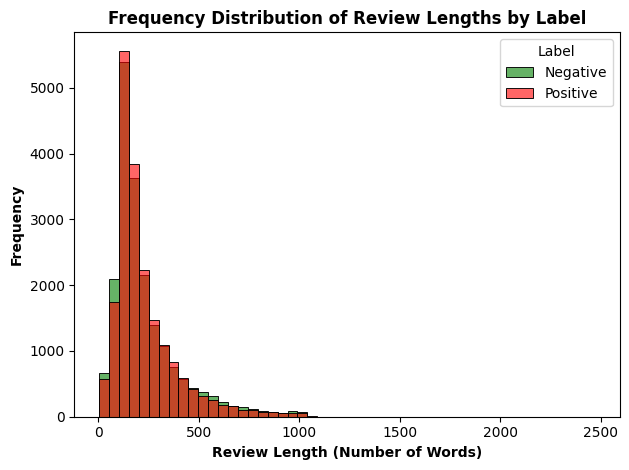

In [ ]:
sns.histplot(data=df, x="text_length", hue="label", bins=50, kde=False, palette={0: "red", 1: "green"}, alpha=0.6)

plt.title("Frequency Distribution of Review Lengths by Label", fontweight='bold')
plt.xlabel("Review Length (Number of Words)", fontweight='bold')
plt.ylabel("Frequency", fontweight='bold')
plt.legend(title="Label", labels=["Negative", "Positive"])
plt.grid(False)
plt.tight_layout()
plt.show()

# Data preprocessing

## Lowercasing

lowercasing the data reduces dimensionality, since data and Data will become identical. Thus, this saves computation and makes features more distinct.

## Removing non-textual elements

there may be emojis, hyperlinks or other kinds of non-textual elements that may obscure the processing of data. They may bring unexplainable rigs to our model's predictions. Thus, they need to be removed. However, a complimentary approach has been used to deal with this problem, in which only textual and numerical data is retained. This way any semantic association of textual elements with the non-textual elements is preserved.

## Tokenization

Tokenization is the process of breaking a larger piece of text into an array of smaller text pieces to use as features. Here, every word/punctuation is converted into one token

## Removing Stopwords

n NLP, stop words are common words (like "the", "a", "is") and punctuations are frequently filtered out before processing text data because they don't carry significant semantic meaning. Here, we use nltk's stopwords list to accomplish this purpose. If the token is not in the stopwords list, it is retained, otherwise it is discarded.

## Stemming/Lemmatization

While stemming is the process of simply removing the suffix, lematization is more robust and converts each word to its root word following a more complex statistical reference. They are used to again reduce the dimensionality of data, since only the root words are enough to convey the notion of positive or negative



In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def preprocess(text):
  # lowercase
  text = text.lower()

  # keep only textual/numerical data
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

  # tokenize
  tokens = nltk.word_tokenize(text)

  # remove stopwords
  tokens = [word for word in tokens if word not in stop_words]

  # stemming
  stemmed = [stemmer.stem(word) for word in tokens]

  # lemmatization
  lemmatized = [lemmatizer.lemmatize(word) for word in stemmed]

  print('preprocessing successful')

  return " ".join(lemmatized)


In [ ]:
df["clean_text"] = df["text"].apply(preprocess)

Streaming output truncated to the last 5000 lines.
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful
preprocessing successful

# Train Test Split

In [ ]:
X = df["clean_text"]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Developing Model Pipeline

the goal is to utilise the available models for binary classification and compare their results. This is accomplished through a 'classifier' pipeline that enlists the possible classifiers

## Dynamic approach towards integrating a Neural Network

the input dimension of a neural network is static, and hence it has to be explicitly passed as an argument in the model while the classical learning approaches do not require the information of the dimensionality of input. Hence, when data reaches the neural network at the end of the pipeline, the input dimension is explicitly passed as "input_di = X_train[1]" and the neural network is fed forward.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": BernoulliNB(),
    "Neural Network": None
}

# Feature Extraction using Count and TF-IDF

both count vectorizer and TF-IDF vectorizer are standard practices of feature extraction used in NLP. While Count Vectorizer is based on a simple frequency-based approach to generate the vectors, TF-IDF places importance on the key words used in the corpus.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizers = {
    "Count Vectorizer": CountVectorizer(),
    "TF-IDF Vectorizer": TfidfVectorizer()
}

In [ ]:
!pip install scikeras[tensorflow-cpu]

In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:
def create_nn(input_dim):
    nn = Sequential()
    nn.add(Dense(64, activation='relu', input_dim=input_dim))
    nn.add(Dense(32, activation='relu'))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return nn


 Using Count Vectorizer + Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.88      0.87      0.87      5934
           1       0.87      0.88      0.88      5983

    accuracy                           0.87     11917
   macro avg       0.88      0.87      0.87     11917
weighted avg       0.88      0.87      0.87     11917

Confusion Matrix:
[[5141  793]
 [ 697 5286]]
ROC AUC Score: 0.9412257322046211

 Using Count Vectorizer + SVM
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      5934
           1       0.85      0.89      0.87      5983

    accuracy                           0.87     11917
   macro avg       0.87      0.87      0.87     11917
weighted avg       0.87      0.87      0.87     11917

Confusion Matrix:
[[4990  944]
 [ 634 5349]]
ROC AUC Score: 0.8674749223462657

 Using Count Vectorizer + Random Forest
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5934
       

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


              precision    recall  f1-score   support

           0       0.88      0.85      0.87      5934
           1       0.86      0.89      0.87      5983

    accuracy                           0.87     11917
   macro avg       0.87      0.87      0.87     11917
weighted avg       0.87      0.87      0.87     11917

Confusion Matrix:
[[5056  878]
 [ 670 5313]]
ROC AUC Score: 0.9374062371190904

 Using TF-IDF Vectorizer + Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5934
           1       0.87      0.90      0.89      5983

    accuracy                           0.88     11917
   macro avg       0.88      0.88      0.88     11917
weighted avg       0.88      0.88      0.88     11917

Confusion Matrix:
[[5165  769]
 [ 613 5370]]
ROC AUC Score: 0.9534344331746375

 Using TF-IDF Vectorizer + SVM
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      5934

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


              precision    recall  f1-score   support

           0       0.87      0.86      0.87      5934
           1       0.86      0.88      0.87      5983

    accuracy                           0.87     11917
   macro avg       0.87      0.87      0.87     11917
weighted avg       0.87      0.87      0.87     11917

Confusion Matrix:
[[5087  847]
 [ 736 5247]]
ROC AUC Score: 0.9421594951565105


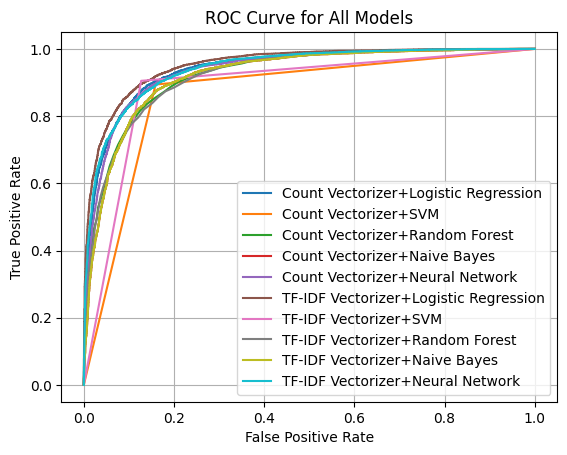

In [ ]:
for vec_name, vec in vectorizers.items():
    X_vec = vec.fit_transform(X_train)
    X_test_vec = vec.transform(X_test)

    for name, clf in classifiers.items():
        print(f"\n Using {vec_name} + {name}")

        if name == "Neural Network":
            input_dim = X_vec.shape[1]
            keras_clf = KerasClassifier(build_fn=lambda: create_nn(input_dim), epochs=5, verbose=0)
            keras_clf._estimator_type = "classifier"
            clf = keras_clf

        clf.fit(X_vec, y_train)
        y_pred = clf.predict(X_test_vec)
        y_prob = clf.predict_proba(X_test_vec)[:, 1] if hasattr(clf, "predict_proba") else y_pred

        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{vec_name}+{name}")

plt.title("ROC Curve for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install --upgrade --no-cache-dir numpy gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 7.4 MB/s eta 0:00:00


# Feature Extraction using Word2Vec

Word2Vec is trickier to use since it converts each token to a vector, while the input is a series of tokens. Therefore, there is a need to devise a way to pool these vectors into a single one.

The approach here used is to first convert all tokens into vectors and then generating a resultant vector by adding the vectors for the entire list of tokens by first scaling each token based on a Gaussian Distribution with mean at the "centroid" of all vectors and variance as half the distance between the farthest vector from the centroid.

## Reasoning

consider a hyperspace with words as vectors. Words that describe positive reviews are semantically different from those that describe negative reviews. Thus, there should exist a drawable decision boundary between the two classes. Vectors that are semantically and geometrically closer to the centroid are given more weightage, under the assumption that the centriods of the two classes lie on opposite sides of the decision boundaries. Hence, the vectors are sampled based on their closeness to the centriod, such that semantic meaning is preserved while outliers are dealt accordingly.

In [ ]:
import numpy as np
from scipy.stats import norm
from gensim.models import Word2Vec
from tqdm import tqdm

sentences = df["clean_text"].tolist()

my_w2v_model = Word2Vec(
    sentences,
    vector_size=100,      # a hyperparameter to consider
    window=5,
    min_count=2,
    workers=4,
    sg=1,                 # 1 = skip-gram; 0 = CBOW
    epochs=10
)

word_vectors = my_w2v_model.wv


def get_weighted_sentence_vector(sentence, model):
    vectors = []
    for word in sentence:
        if word in model:
            vectors.append(model[word])

    if len(vectors) == 0:
        return np.zeros(model.vector_size)

    vectors = np.array(vectors)
    centroid = np.mean(vectors, axis=0)
    dists = np.linalg.norm(vectors - centroid, axis=1)

    # Estimate variance as half the max distance
    sigma = np.max(dists) / 2 if np.max(dists) > 0 else 1e-6
    weights = norm.pdf(dists, loc=0, scale=sigma)
    weights /= weights.sum()  # Normalize weights

    weighted_vec = np.average(vectors, axis=0, weights=weights)
    return weighted_vec

In [ ]:
def vectorize_sentences_weighted(X_tokenized, model):
    return np.array([get_weighted_sentence_vector(sentence, model) for sentence in X_tokenized])

In [ ]:
X_train_vec = vectorize_sentences_weighted(X_train, word_vectors)
X_test_vec = vectorize_sentences_weighted(X_test, word_vectors)


 Word2Vec Weighted + Logistic Regression
              precision    recall  f1-score   support

           0       0.59      0.58      0.58      5934
           1       0.59      0.60      0.59      5983

    accuracy                           0.59     11917
   macro avg       0.59      0.59      0.59     11917
weighted avg       0.59      0.59      0.59     11917

Confusion Matrix:
[[3414 2520]
 [2401 3582]]
ROC AUC Score: 0.6209493632700809

 Word2Vec Weighted + SVM
              precision    recall  f1-score   support

           0       0.62      0.59      0.60      5934
           1       0.61      0.63      0.62      5983

    accuracy                           0.61     11917
   macro avg       0.61      0.61      0.61     11917
weighted avg       0.61      0.61      0.61     11917

Confusion Matrix:
[[3503 2431]
 [2191 3792]]
ROC AUC Score: 0.612061342098309

 Word2Vec Weighted + Random Forest
              precision    recall  f1-score   support

           0       0.61      0

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


              precision    recall  f1-score   support

           0       0.52      0.90      0.66      5934
           1       0.65      0.18      0.29      5983

    accuracy                           0.54     11917
   macro avg       0.59      0.54      0.47     11917
weighted avg       0.59      0.54      0.47     11917

Confusion Matrix:
[[5345  589]
 [4880 1103]]
ROC AUC Score: 0.611992291832814


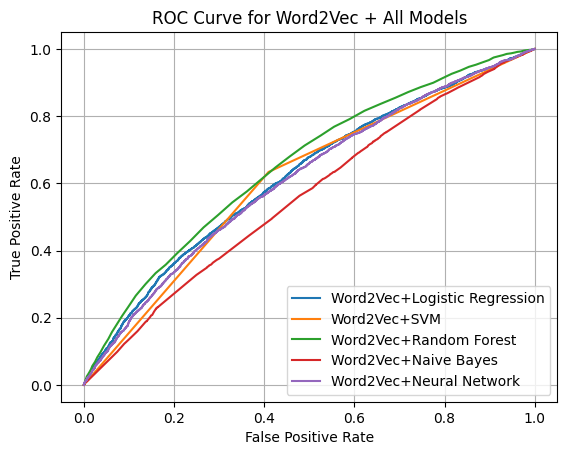

In [ ]:
for name, clf in classifiers.items():
    print(f"\n Word2Vec Weighted + {name}")

    if name == "Neural Network":
        input_dim = X_train_vec.shape[1]
        keras_clf = KerasClassifier(build_fn=lambda: create_nn(input_dim), epochs=5, verbose=0)
        keras_clf._estimator_type = "classifier"
        clf = keras_clf

    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)
    y_prob = clf.predict_proba(X_test_vec)[:, 1] if hasattr(clf, "predict_proba") else y_pred

    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"Word2Vec+{name}")

plt.title("ROC Curve for Word2Vec + All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Conclusion

Thus, we see that TF-IDF Vectorizer gives the best classification results with a classifier followed by Count Vectorizer and Word2Vec respectively.

In Count Vectorizer and TF-IDF vectorizer, logistic regression performs better than the rest of the classifiers. In word2vec, random forest classifier has better metrics than the rest.